In [1]:
pip install pandas numpy statsmodels matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow-macos tensorflow-metal


Note: you may need to restart the kernel to use updated packages.


# Data Cleaning, Preprocessing & Exploratory Data Analysis 

In [123]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
import joblib

In [125]:
df = pd.read_csv('/Users/shraddhadebata/Desktop/PythonProject/Demand Forecasting for Inventory Management/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [127]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [129]:
df.shape

(1465, 16)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [133]:
#Clean prices
df['discounted_price'] = (
    df['discounted_price'].astype(str)
      .str.replace('₹', '', regex=False)
      .str.replace(',', '', regex=False)
      .astype(float)
)

df['actual_price'] = (
    df['actual_price'].astype(str)
      .str.replace('₹', '', regex=False)
      .str.replace(',', '', regex=False)
      .astype(float)
)

df['discount_percentage'] = (
    df['discount_percentage'].astype(str)
      .str.replace('%', '', regex=False)
      .astype(float)
)

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = (
    df['rating_count'].astype(str)
      .str.replace(',', '', regex=False)
      .pipe(pd.to_numeric, errors='coerce')
)

In [135]:
print(df['discounted_price'])

0        399.0
1        199.0
2        199.0
3        329.0
4        154.0
         ...  
1460     379.0
1461    2280.0
1462    2219.0
1463    1399.0
1464    2863.0
Name: discounted_price, Length: 1465, dtype: float64


In [137]:
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    181
3.9    123
4.4    123
3.8     86
4.5     75
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.0      4
3.1      4
5.0      3
4.8      3
3.2      2
2.8      2
2.3      1
2.0      1
2.6      1
2.9      1
Name: count, dtype: int64

In [139]:
#Change "|" to a random number or drop it.
#df['rating'] = df['rating'].str.replace('|','4.5')

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = (
    df['rating_count'].astype(str)
      .str.replace('|', '', regex=False)
      .pipe(pd.to_numeric, errors='coerce')
)

In [141]:
df['rating'].head()

0    4.2
1    4.0
2    3.9
3    4.2
4    4.2
Name: rating, dtype: float64

In [143]:
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [145]:
#Change datatypes
df[['discounted_price','actual_price']] = df[['discounted_price','actual_price']].astype('float64')
df[['discount_percentage','rating', 'rating_count']] = df[['discount_percentage','rating', 'rating_count']].astype('float64')

In [147]:
#Change percentage value to point
df['discount_percentage'] = df['discount_percentage']/100
df['discount_percentage']

0       0.64
1       0.43
2       0.90
3       0.53
4       0.61
        ... 
1460    0.59
1461    0.25
1462    0.28
1463    0.26
1464    0.22
Name: discount_percentage, Length: 1465, dtype: float64

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [151]:
#Data Cleaning: Duplicate rows and null values
df.duplicated().sum()

0

In [153]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [155]:
df = df.dropna()

In [157]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,3129.981826,5453.087743,0.476724,4.096717,18307.376881
std,6950.548042,10884.467444,0.216139,0.289497,42766.096572
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1191.500000
50%,799.000000,1670.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4321.250000,0.630000,4.300000,17342.250000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


In [159]:
df.describe(include='O')

,product_id,product_name,category,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462
unique,1348,1334,211,1290,1191,1191,1191,1191,1209,1409,1462
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,231,6,10,10,10,10,8,3,1


In [161]:
#Check numeric columns
numeric_cols = df.select_dtypes(include=['number'])
numeric_cols

,discounted_price,actual_price,discount_percentage,rating,rating_count
0,399.0,1099.0,0.64,4.2,24269.0
1,199.0,349.0,0.43,4.0,43994.0
2,199.0,1899.0,0.90,3.9,7928.0
3,329.0,699.0,0.53,4.2,94363.0
4,154.0,399.0,0.61,4.2,16905.0
...,...,...,...,...,...
1460,379.0,919.0,0.59,4.0,1090.0
1461,2280.0,3045.0,0.25,4.1,4118.0
1462,2219.0,3080.0,0.28,3.6,468.0
1463,1399.0,1890.0,0.26,4.0,8031.0


In [163]:
# Combine the review title and content for a more comprehensive text
df['full_review'] = df['review_title'] + ' ' + df['review_content']

#Define a function for text cleaning
def clean_text(text):
    #Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    #Remove extra spaces
    text = re.sub(r'\s+',' ',text).strip()
    return text

df['cleaned_text'] = df['full_review'].apply(clean_text)

* Aggregated to product-level (some products appear 2–3 times): 

* Price/discount: median

* Rating: mean

* rating_count: max (cumulative)

* Text: concatenated review_title + review_content (capped length) and cleaned.

In [168]:
df['full_review'] = (df.get('review_title', '').astype(str) + ' ' +
                     df.get('review_content', '').astype(str)).str.strip()

agg = (df.groupby('product_id', as_index=False)
         .agg({
           'product_name':'first',
           'category':'first',
           'discounted_price':'median',
           'actual_price':'median',
           'discount_percentage':'median',
           'rating':'mean',
           'rating_count':'max',
           'about_product':'first',
           'full_review': lambda s: ' '.join(s.dropna().astype(str))[:5000]
         }))

agg = agg[~agg['rating_count'].isna()].copy()

#Text Feature
def clean_text(text):
    if not isinstance(text,str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

#create clean, lowercase, plain-word versions of: The product’s About description, The combined reviews.
agg['about_clean'] = agg['about_product'].apply(clean_text)
agg['review_clean'] = agg['full_review'].apply(clean_text)

#Splits each cleaned text into words and counts them.
#about_len = number of words in the product’s about section.
#review_len = total number of words in all cleaned reviews.
agg['about_len']  = agg['about_clean'].str.split().apply(len)
agg['review_len'] = agg['review_clean'].str.split().apply(len)

#These are two small sets of positive and negative words (a mini sentiment dictionary).
#They will be used to count how many “good” vs “bad” words appear in each review.
pos_words = {'good','great','excellent','amazing','love','fantastic','best','perfect','nice','durable','worth','value','recommend'}
neg_words = {'bad','poor','terrible','worst','broke','broken','waste','cheap','disappointed','hate','slow','issue','return'}

def count_lexicon(text,lexicon):
    toks = text.split()
    return sum(1 for t in toks if t in lexicon)

agg['pos_count'] = agg['review_clean'].apply(lambda t: count_lexicon(t, pos_words))
agg['neg_count'] = agg['review_clean'].apply(lambda t: count_lexicon(t, neg_words))
agg['sentiment_delta'] = agg['pos_count'] - agg['neg_count']

#Target
agg['y'] = np.log1p(agg['rating_count'])

# EDA

* Histogram of rating_count

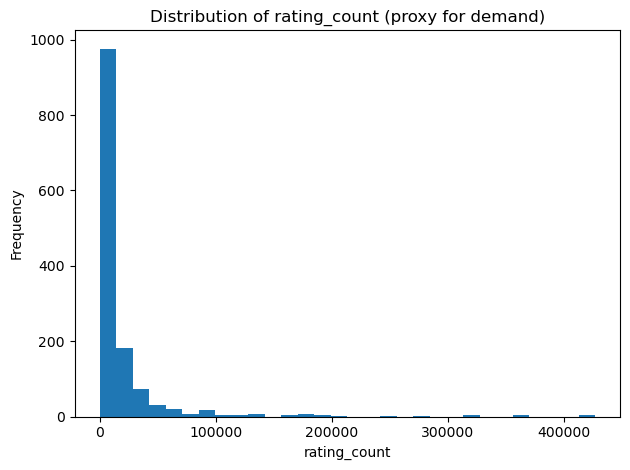

In [173]:
#Understand how many products have low vs. high demand.
plt.figure()
plt.hist(agg['rating_count'].dropna(), bins=30)
plt.title("Distribution of rating_count (proxy for demand)")
plt.xlabel("rating_count"); plt.ylabel("Frequency"); plt.tight_layout(); plt.show()

* Histogram of log-transformed demand

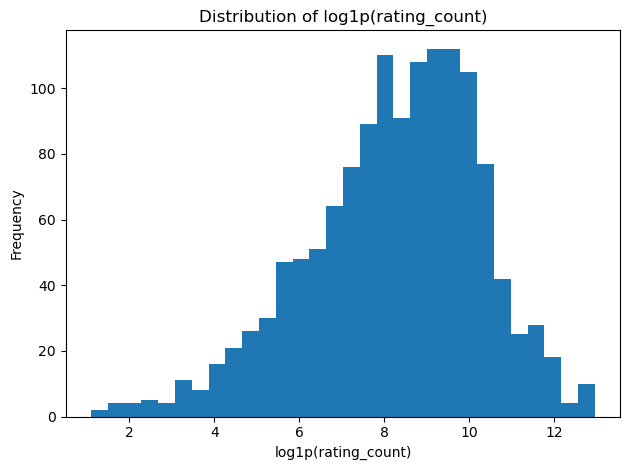

In [176]:
#After taking log1p (log(1 + x)), check if the target is more symmetric and easier for ML models to fit.
plt.figure()
plt.hist(agg['y'].dropna(), bins=30)
plt.title("Distribution of log1p(rating_count)")
plt.xlabel("log1p(rating_count)"); plt.ylabel("Frequency"); plt.tight_layout(); plt.show()

* scatter plot for Discounted Price vs. Rating Count

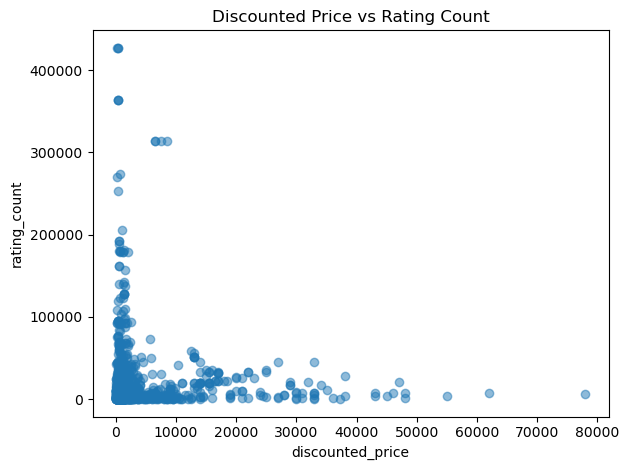

In [183]:
# Detect whether cheaper products get more reviews (proxy for higher demand).
plt.figure()
plt.scatter(agg['discounted_price'], agg['rating_count'], alpha=0.5)
plt.title("Discounted Price vs Rating Count")
plt.xlabel("discounted_price"); plt.ylabel("rating_count"); plt.tight_layout(); plt.show()


* Scatter: Discount % vs. Rating Count

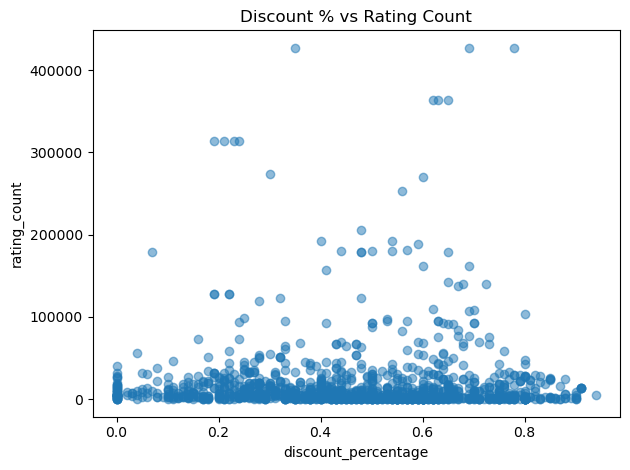

In [186]:
#See if higher discounts drive demand.
plt.figure()
plt.scatter(agg['discount_percentage'], agg['rating_count'], alpha=0.5)
plt.title("Discount % vs Rating Count")
plt.xlabel("discount_percentage"); plt.ylabel("rating_count"); plt.tight_layout(); plt.show()


* Scatter: Average Rating vs. Rating Count

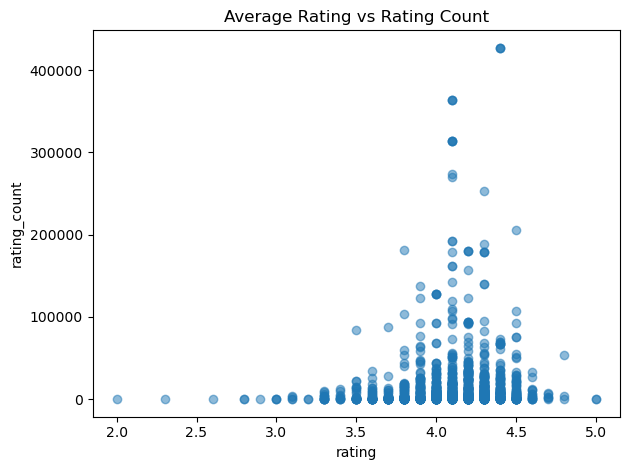

In [191]:
#Explore if better-rated products get more reviews/sales.
plt.figure()
plt.scatter(agg['rating'], agg['rating_count'], alpha=0.5)
plt.title("Average Rating vs Rating Count")
plt.xlabel("rating"); plt.ylabel("rating_count"); plt.tight_layout(); plt.show()


# Data Modelling

In [204]:
numeric_features = ['discounted_price','actual_price','discount_percentage',
                    'rating','about_len','review_len','pos_count','neg_count','sentiment_delta']
topN = 20
top_cats = agg['category'].value_counts().head(topN).index.tolist()
agg['category_limited'] = agg['category'].where(agg['category'].isin(top_cats), 'Other')

X = agg[numeric_features + ['category_limited']]
y = agg['y']

pre = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'),['category_limited'])
    ]
)

model = GradientBoostingRegressor(random_state=42)
pipe = Pipeline([('pre', pre), ('model', model)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe.fit(X_train, y_train)

y_pred_log = pipe.predict(X_test)
y_test_orig = np.expm1(y_test)
y_pred_orig = np.expm1(y_pred_log)

rmse = mean_squared_error(y_test_orig, y_pred_orig, squared=False)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test, y_pred_log)

print({"RMSE (rating_count)": rmse, "MAE (rating_count)": mae, "R2 (log)": r2})

{'RMSE (rating_count)': 29594.01223689171, 'MAE (rating_count)': 12059.581750121823, 'R2 (log)': 0.3774104642364444}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [210]:
#Feature Importance
ohe = pipe.named_steps['pre'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(['category_limited']).tolist()
all_feature_names = numeric_features+cat_feature_names

importance = getattr(pipe.named_steps['model'],"feature_importance_",None)
if importance is not None:
    feat_imp = (pd.DataFrame({"feature": all_feature_names, "importance": importances})
                  .sort_values("importance", ascending=False))
    print(feat_imp.head(20))
    feat_imp.to_csv("feature_importances.csv", index=False)

In [212]:
#What-if: 10% price cut
top5 = agg.sort_values('rating_count', ascending=False).head(5).copy()
X_top5 = top5[numeric_features + ['category_limited']].copy()

base = np.expm1(pipe.predict(X_top5))

X_price_cut = X_top5.copy()
X_price_cut['discounted_price'] = X_price_cut['discounted_price'] * 0.9

with np.errstate(divide='ignore', invalid='ignore'):
    X_price_cut['discount_percentage'] = np.where(
        (top5['actual_price'] > 0) & (~top5['actual_price'].isna()),
        (1 - (X_price_cut['discounted_price'] / top5['actual_price'])) * 100,
        X_price_cut['discount_percentage']
    )

pred_cut = np.expm1(pipe.predict(X_price_cut))

In [214]:
scenario = top5[['product_id','product_name','category','discounted_price','actual_price','discount_percentage','rating','rating_count']].copy()
scenario['pred_demand_baseline'] = base
scenario['pred_demand_price_cut_10pct'] = pred_cut
scenario['delta'] = scenario['pred_demand_price_cut_10pct'] - scenario['pred_demand_baseline']
scenario['delta_pct'] = np.where(scenario['pred_demand_baseline']>0, scenario['delta']/scenario['pred_demand_baseline']*100, np.nan)
print(scenario)
scenario.to_csv("price_cut_scenario_top5.csv", index=False)

# Save artifacts for reuse
agg.to_csv("amazon_product_level.csv", index=False)
joblib.dump(pipe, "demand_model_pipeline.pkl")


     product_id                                       product_name  \
356  B07KSMBL2H  AmazonBasics Flexible Premium HDMI Cable (Blac...   
137  B014I8SSD0  Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   
138  B014I8SX4Y  Amazon Basics High-Speed HDMI Cable, 6 Feet (2...   
317  B07GPXXNNG  boAt Bassheads 100 in Ear Wired Earphones with...   
318  B07GQD4K6L  boAt Bassheads 100 in Ear Wired Earphones with...   

                                              category  discounted_price  \
356  Electronics|HomeTheater,TV&Video|Accessories|C...             219.0   
137  Electronics|HomeTheater,TV&Video|Accessories|C...             309.0   
138  Electronics|HomeTheater,TV&Video|Accessories|C...             309.0   
317  Electronics|Headphones,Earbuds&Accessories|Hea...             349.0   
318  Electronics|Headphones,Earbuds&Accessories|Hea...             379.0   

     actual_price  discount_percentage  rating  rating_count  \
356         700.0                 0.69     4.4      426973

['demand_model_pipeline.pkl']